In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [2]:
data=pd.read_excel("Bike_Sales_New.xlsx")

In [3]:
data.head(20)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2018-07-01,1,July,2018,33,Young Adults (25-34),F,United States,Washington,Accessories,Tires and Tubes,Patch Kit/8 Patches,30,1,2,30,30,60
1,2018-07-01,1,July,2018,41,Adults (35-64),M,Germany,Hessen,Accessories,Bottles and Cages,Road Bottle Cage,28,3,9,168,84,252
2,2018-07-01,1,July,2018,33,Young Adults (25-34),F,United States,Washington,Accessories,Tires and Tubes,Patch Kit/8 Patches,24,1,2,24,24,48
3,2018-07-01,1,July,2018,37,Adults (35-64),M,France,Nord,Accessories,Tires and Tubes,LL Road Tire,24,8,21,312,192,504
4,2018-07-01,1,July,2018,30,Young Adults (25-34),F,Germany,Nordrhein-Westfalen,Accessories,Tires and Tubes,Road Tire Tube,22,1,4,66,22,88
5,2018-07-01,1,July,2018,42,Adults (35-64),F,France,Seine Saint Denis,Accessories,Tires and Tubes,Patch Kit/8 Patches,22,1,2,22,22,44
6,2018-07-01,1,July,2018,42,Adults (35-64),F,France,Seine Saint Denis,Accessories,Tires and Tubes,Patch Kit/8 Patches,21,1,2,21,21,42
7,2018-07-01,1,July,2018,19,Youth (<25),F,Germany,Nordrhein-Westfalen,Accessories,Bottles and Cages,Water Bottle - 30 oz.,19,2,5,57,38,95
8,2018-07-01,1,July,2018,37,Adults (35-64),M,France,Nord,Accessories,Tires and Tubes,LL Road Tire,12,8,21,156,96,252
9,2018-07-01,1,July,2018,19,Youth (<25),F,Germany,Nordrhein-Westfalen,Accessories,Bottles and Cages,Water Bottle - 30 oz.,10,2,5,30,20,50


In [4]:
data.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,69407.000000,69407.000000,69407.000000,69407.000000,69407.000000,69407.000000,69407.000000,69407.000000,69407.000000
mean,15.667613,2019.580892,35.694526,13.564900,5.834873,13.675696,84.992047,59.857622,144.849669
std,8.792853,1.115377,11.031530,8.490811,7.128628,14.175763,90.226906,58.886371,142.783583
min,1.000000,2018.000000,17.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
25%,8.000000,2019.000000,27.000000,6.000000,2.000000,5.000000,22.000000,17.000000,40.000000
50%,16.000000,2020.000000,34.000000,13.000000,2.000000,5.000000,52.000000,38.000000,96.000000
75%,23.000000,2021.000000,43.000000,20.000000,8.000000,22.000000,105.000000,84.000000,198.000000
max,31.000000,2021.000000,65.000000,32.000000,42.000000,70.000000,368.000000,304.000000,588.000000


<Axes: >

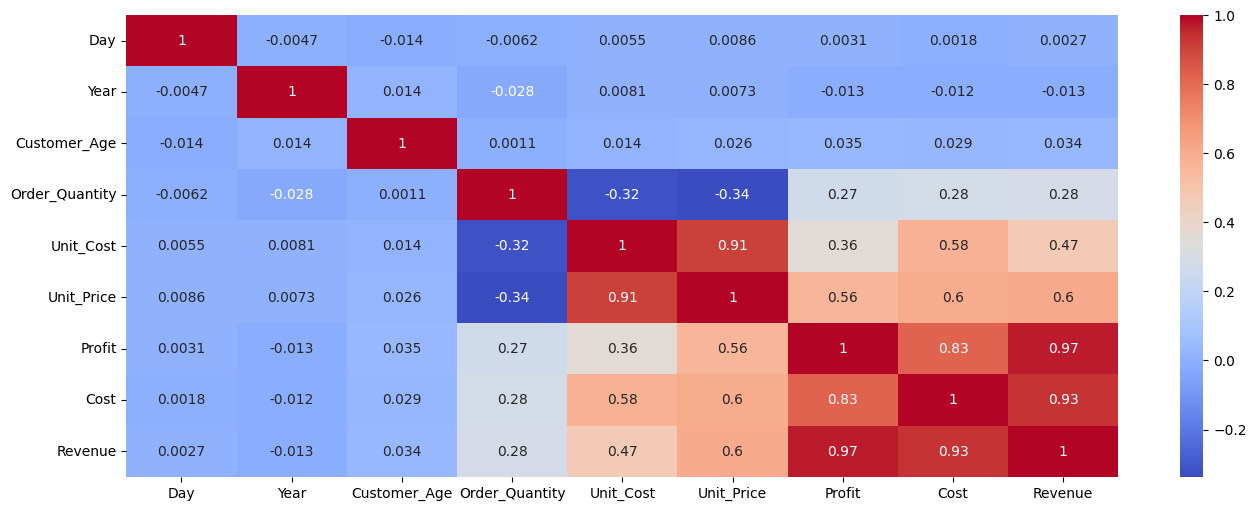

In [9]:
variables=['Day','Year','Customer_Age','Order_Quantity','Unit_Cost','Unit_Price','Profit','Cost','Revenue']
plt.figure(figsize=(16,6))
sns.heatmap(data[variables].corr(),cmap='coolwarm',annot=True)

In [10]:
x=data['Cost']
y=data['Revenue']


In [13]:
x,y=np.array(x),np.array(y)
x

array([30, 84, 24, ...,  2,  8,  2])

In [14]:
x=sm.add_constant(x)
x

array([[ 1., 30.],
       [ 1., 84.],
       [ 1., 24.],
       ...,
       [ 1.,  2.],
       [ 1.,  8.],
       [ 1.,  2.]])

In [18]:
model=sm.OLS(y,x)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                 4.780e+05
Date:                Sun, 17 Nov 2024   Prob (F-statistic):               0.00
Time:                        16:29:19   Log-Likelihood:            -3.7116e+05
No. Observations:               69407   AIC:                         7.423e+05
Df Residuals:                   69405   BIC:                         7.423e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2237      0.275     33.519      0.0

In [19]:
print(f"predicted response:\n{results.predict(x)}")

predicted response:
[ 77.19799209 199.55169189  63.60313656 ...  13.75533294  27.35018847
  13.75533294]


In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
diabetes=load_diabetes()
df=pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target']=diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
correlation_matrix=df.corr()
correlation_matrix


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


predictors=['bmi','bp','s3','s4','s5','s6']

In [6]:
x=df[['bmi','bp','s3','s4','s5','s6']]
y=df['target']

spliting data

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

training a model

In [8]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

predicting using a model


In [9]:
y_pred=model.predict(x_test)

evaluating

In [30]:
from sklearn.metrics import r2_score, mean_squared_error,root_mean_squared_error
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)


In [31]:
print(f"r^2 score: {r2:2f}")
print(f"mean_squared_error: {mse:.3f}")
print(f"root_mean_squared_error: {rmse:.3f}")

r^2 score: 0.446781
mean_squared_error: 2931.041
root_mean_squared_error: 54.139


In [32]:



from sklearn.tree import DecisionTreeRegressor
decision_tree_model=DecisionTreeRegressor()
decision_tree_model.fit(x_train,y_train)

y_pred=decision_tree_model.predict(x_test)

r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
print(f"r^2 score: {r2:2f}")
print(f"mean_squared_error: {mse:.3f}")
print(f"root_mean_squared_error: {rmse:.3f}")


r^2 score: 0.111142
mean_squared_error: 4709.303
root_mean_squared_error: 68.624


In [33]:
from sklearn.svm import SVR
SVR_model=SVR()
SVR_model.fit(x_train,y_train)

y_pred=SVR_model.predict(x_test)

r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
print(f"r^2 score: {r2:2f}")
print(f"mean_squared_error: {mse:.3f}")
print(f"root_mean_squared_error: {rmse:.3f}")


r^2 score: 0.245687
mean_squared_error: 3996.467
root_mean_squared_error: 63.218


In [34]:
import pickle
with open('linear_model.pkl','wb') as file:
    pickle.dump(model,file)